In [1]:
# Importing some needed packages

import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Set default parameters for plots
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [2]:
# Loading the datasets
from pandas import read_csv

train_data = read_csv('../Datasets/mnist_train.csv.gz', compression='gzip', header=None).to_numpy()
test_data = read_csv('../Datasets/mnist_test.csv.gz', compression='gzip', header=None).to_numpy()

In [3]:
# Split into features and labels

X_train = train_data[:,1:]
y_train = train_data[:,0]
X_test = test_data[:,1:]
y_test = test_data[:,0]

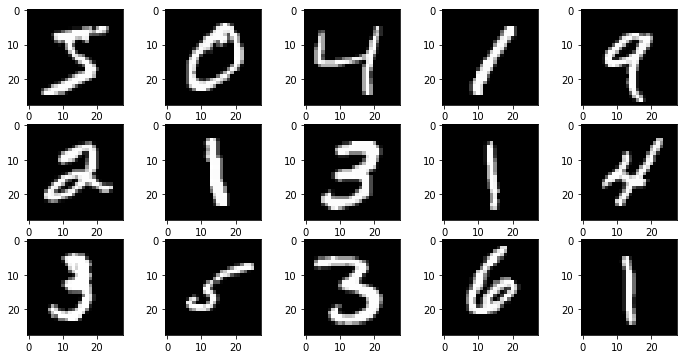

In [4]:
# print some nice images

fig, axes = plt.subplots(3,5)
for i,ax in enumeratefrom sklearn.metrics import accuracy_score, confusion_matrix

def eval_clf(y_pred_train, y_train, y_pred_test, y_test):
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)
    cm_test = confusion_matrix(y_test, y_pred_test)

    return acc_train, acc_test, cm_test(axes.flat):
    ax.imshow(X_train[i].reshape(28, 28))

In [5]:
# clf = make_pipeline(StandardScaler(), svm.SVC(cache_size=4000))
# clf = svm.SVC(cache_size=4000)
#clf = svm.LinearSVC(max_iter=10000)
#clf = clf.fit(X_train, y_train)

In [13]:
def svc_param_selection(estimator, X, y):
    C = [0.001, 0.01, 0.1, 1, 10]
    gamma = [0.001, 0.01, 0.1, 1, 'scale', 'auto']
    param_grid = {'C': C, 'gamma' : gamma}
    grid_search = GridSearchCV(estimator, param_grid, n_jobs=-1)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

In [14]:
# reduce selection size as it has computation upper bound of O(n^3)

X = X_train[:3000]
y = y_train[:3000]

rbf_best = svc_param_selection(
    SVC(cache_size=1000),
    X,
    y,
)

print("Best parameters for linear SVC: {}".format(rbf_best))

# Best parameters for linear SVC: {'C': 10, 'gamma': 'scale'}

Best parameters for linear SVC: {'C': 10, 'gamma': 'scale'}


In [15]:
C = 10
gamma = 'scale'

clf = SVC(C=C, gamma=gamma, cache_size=4000)
clf = clf.fit(X_train, y_train)

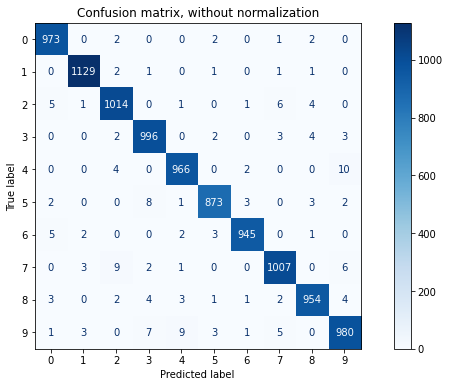

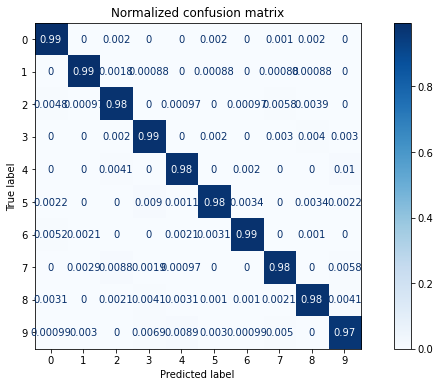

In [20]:
from sklearn.metrics import plot_confusion_matrix


# acc_train = accuracy_score(y_train, clf.predict(X_train))
# acc_test = accuracy_score(y_test, clf.predict(X_test))
#
# print("Linear SVM accuracy train: {}".format(acc_train))
# print("Linear SVM accuracy test: {}".format(acc_test))

class_names = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]

np.set_printoptions(precision=2)
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

plt.show()

# Linear SVM accuracy train: 0.9999
# Linear SVM accuracy test: 0.9837